# Bike Sharing Demand

# Abdul Rehman Mirza MSDS18009
# Rana Khurram MSDS18027
# Rana Sarmad MSDS180
# Afraz Khalid MSDS180

# Overview
In Bike Sharing Demand we are given with hourly data of Bike sharing service 
Telling us about the hourly demand of Bikes.


# Goal
System must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.




# Exploring Data
Importing Librararies and Data in to Data frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
import missingno as msno


In [2]:
data = pd.read_csv("train.csv")

In [3]:


data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 12 columns):
datetime      5442 non-null object
season        5442 non-null int64
holiday       5442 non-null int64
workingday    5442 non-null int64
weather       5442 non-null int64
temp          5442 non-null float64
atemp         5442 non-null float64
humidity      5442 non-null int64
windspeed     5371 non-null float64
casual        5442 non-null int64
registered    5442 non-null int64
count         5442 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 510.3+ KB


# Data Analysis
# Missing Values

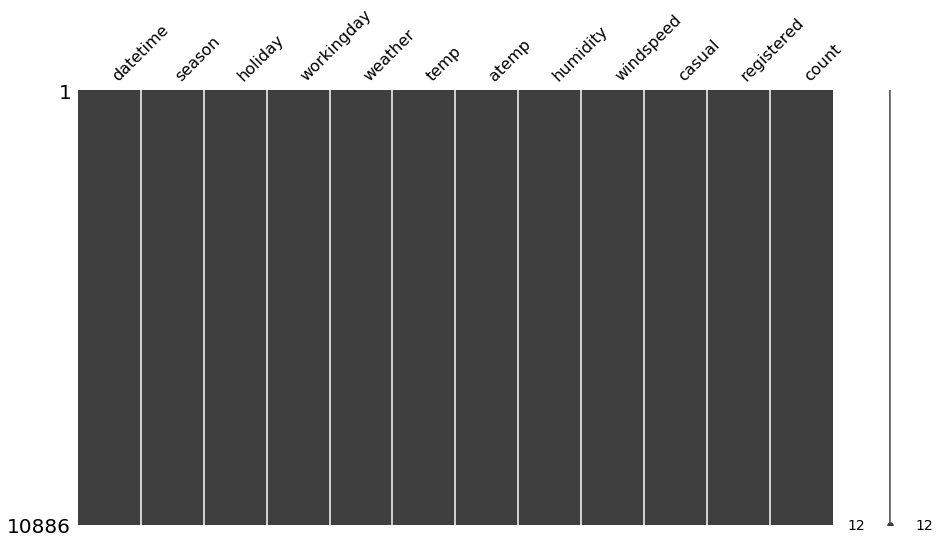

In [4]:
msno.matrix(data,figsize=(15,8))

In [5]:
nan_rows = data[np.isnan(data.windspeed)]
nan_rows.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [7]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.date
data.windspeed = data.groupby('date')['windspeed'].apply(lambda x: x.fillna(x.mean()))
data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011-01-01
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011-01-01
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011-01-01


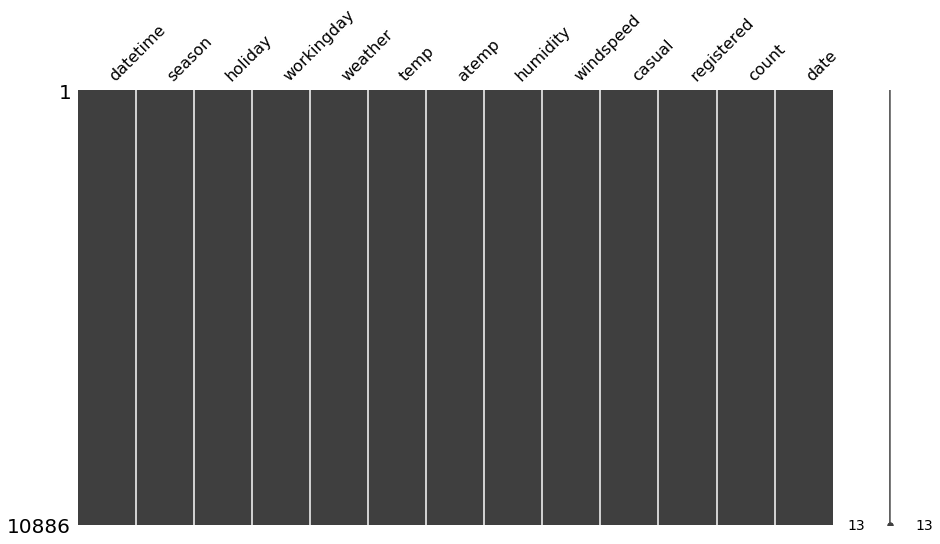

In [8]:
msno.matrix(data,figsize=(15,8))

# OutLiers Detection

# Outliers In Count

Text(0.5,1,'Outliers In count')

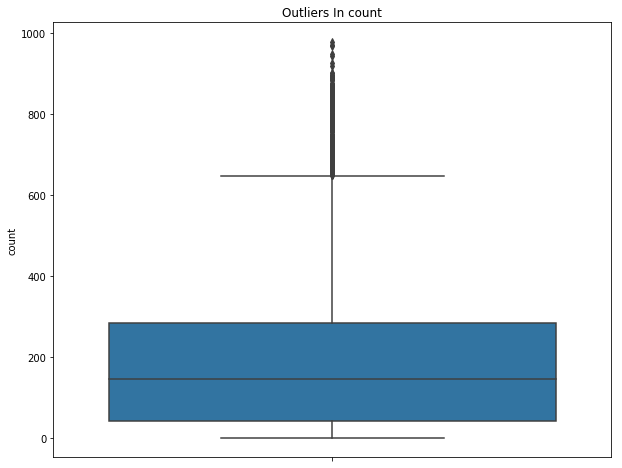

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))

sn.boxplot(data=data,y="count",orient="v",ax=axes).set_title('Outliers In count')


# Outliers in Season, Weather, Working Day and Holiday

[Text(0,0,'Non Holiday'), Text(0,0,'Holiday')]

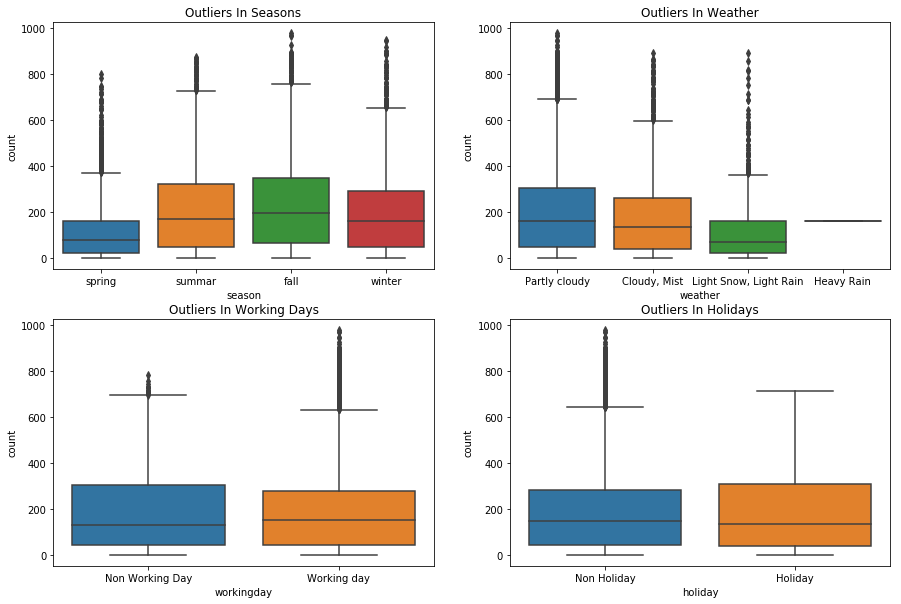

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sn.boxplot(data=data,y="count",x="season",orient="v",ax=axes[0,0]).set_title('Outliers In Seasons')
axes[0,0].set_xticklabels(["spring", "summar", "fall", "winter"])

sn.boxplot(data=data,y="count",x="weather",orient="v",ax=axes[0,1]).set_title('Outliers In Weather')
axes[0,1].set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])

sn.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[1,0]).set_title('Outliers In Working Days')
axes[1,0].set_xticklabels([ "Non Working Day", "Working day"])

sn.boxplot(data=data,y="count",x="holiday",orient="v",ax=axes[1,1]).set_title('Outliers In Holidays')
axes[1,1].set_xticklabels(["Non Holiday", "Holiday"])





# Removing Outliers

In [11]:
res1 = data["count"]-data["count"].mean()

res2 = 2*data["count"].std()

res = np.abs(res1)<=(res2)

dataOL = data[res]
data=dataOL

Text(0.5,1,'Outliers In count')

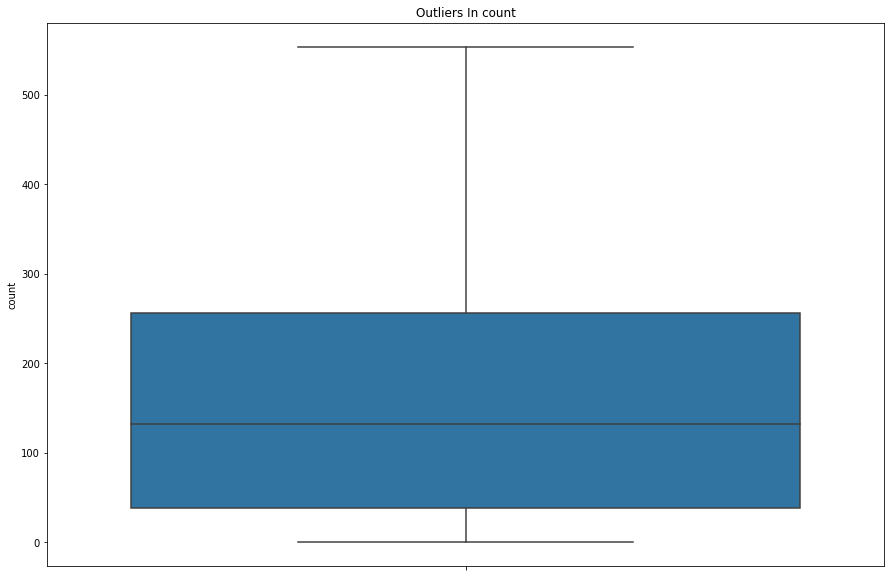

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))

sn.boxplot(data=data,y="count",orient="v",ax=axes).set_title('Outliers In count')


[Text(0,0,'Non Holiday'), Text(0,0,'Holiday')]

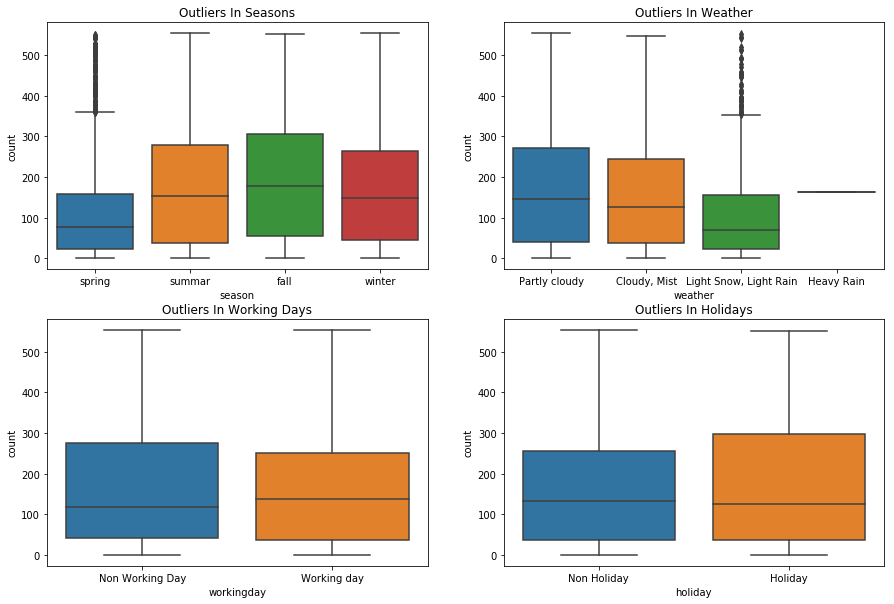

In [14]:

fig, axes = plt.subplots(2, 2, figsize=(15,10))

sn.boxplot(data=data,y="count",x="season",orient="v",ax=axes[0,0]).set_title('Outliers In Seasons')
axes[0,0].set_xticklabels(["spring", "summar", "fall", "winter"])

sn.boxplot(data=data,y="count",x="weather",orient="v",ax=axes[0,1]).set_title('Outliers In Weather')
axes[0,1].set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])

sn.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[1,0]).set_title('Outliers In Working Days')
axes[1,0].set_xticklabels([ "Non Working Day", "Working day"])

sn.boxplot(data=data,y="count",x="holiday",orient="v",ax=axes[1,1]).set_title('Outliers In Holidays')
axes[1,1].set_xticklabels(["Non Holiday", "Holiday"])





# Feature Engineering

In [31]:

data['day'] = data['datetime'].dt.dayofyear

data['month'] = data['datetime'].dt.month

data['dayofweek'] = data['datetime'].dt.dayofweek

data['hours'] = data['datetime'].dt.hour

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10297 non-null datetime64[ns]
season        10297 non-null category
holiday       10297 non-null category
workingday    10297 non-null category
weather       10297 non-null category
temp          10297 non-null float64
atemp         10297 non-null float64
humidity      10297 non-null int64
windspeed     10297 non-null float64
casual        10297 non-null int64
registered    10297 non-null int64
count         10297 non-null int64
date          10297 non-null object
day           10297 non-null int64
month         10297 non-null int64
dayofweek     10297 non-null int64
hours         10297 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [16]:
categorydata = ["season","weather","holiday","workingday", 'day','month','dayofweek', 'hours']
for col in categorydata:
    data[col] = data[col].astype("category")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10297 non-null datetime64[ns]
season        10297 non-null category
holiday       10297 non-null category
workingday    10297 non-null category
weather       10297 non-null category
temp          10297 non-null float64
atemp         10297 non-null float64
humidity      10297 non-null int64
windspeed     10297 non-null float64
casual        10297 non-null int64
registered    10297 non-null int64
count         10297 non-null int64
date          10297 non-null object
day           10297 non-null int64
month         10297 non-null int64
dayofweek     10297 non-null int64
hours         10297 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.5+ MB


[Text(0,0.5,'Avearage Count'),
 Text(0.5,0,'Month'),
 Text(0.5,1,'Average Count By Month')]

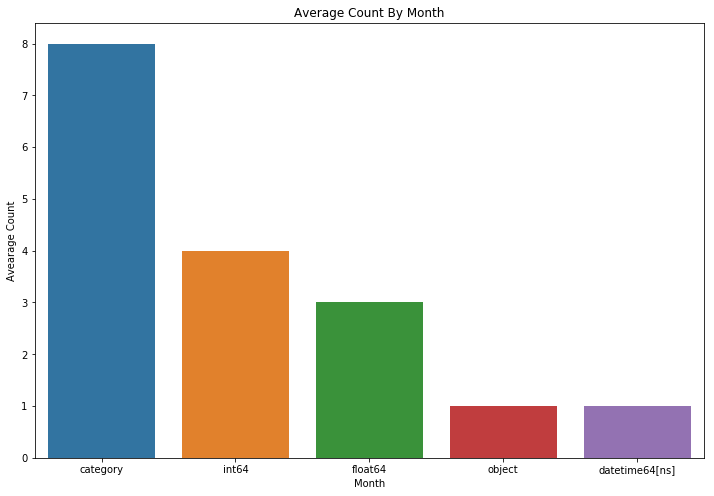

In [18]:
from collections import OrderedDict
cols = {}
cols_string = []
cols_val = []
for col in data:
    if(str(data[col].dtype) in cols):
        cols[str(data[col].dtype)] += 1
    else:
        cols[str(data[col].dtype)] = 1

cols = OrderedDict(sorted(cols.items(), key=lambda kv: kv[1],reverse=True))

colss = {"string":list(cols.keys()), "value":list(cols.values())}

dtypeFrame = pd.DataFrame.from_dict(colss)

dtypeFrame.head()

figure,(ax1)= plt.subplots(nrows=1, figsize=(12,8))

sn.barplot(data=dtypeFrame,x="string",y="value",ax=ax1)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")


In [19]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10297.000000,10297.000000,10297.000000,10297.000000,10297.000000,10297.00000,10297.000000
mean,19.918267,23.323516,62.534719,12.714297,31.376129,132.58755,163.963679
std,7.774024,8.469574,19.166590,8.166270,41.984441,114.99160,141.605168
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,13.940000,16.665000,48.000000,7.001500,3.000000,32.00000,38.000000
50%,19.680000,23.485000,62.000000,11.001400,15.000000,109.00000,132.000000
75%,26.240000,30.305000,78.000000,16.997900,43.000000,202.00000,256.000000
max,41.000000,45.455000,100.000000,56.996900,272.000000,533.00000,553.000000


# Data Analysis

[Text(0,0.5,'Avearage Count'),
 Text(0.5,0,'Hour'),
 Text(0.5,1,'Avergae Count By Hours')]

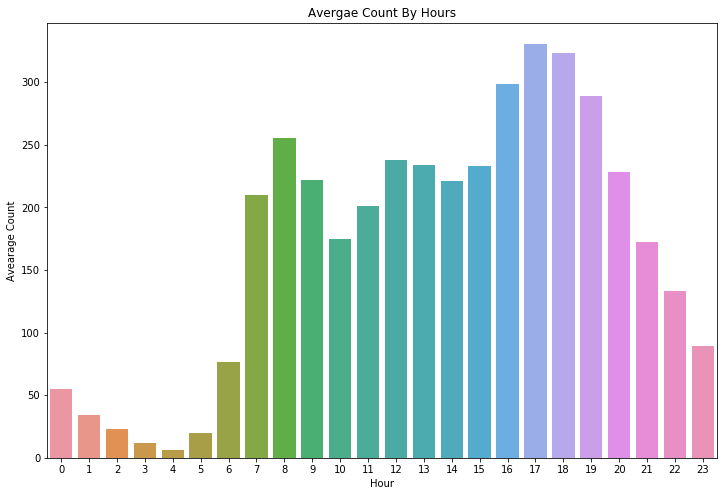

In [20]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(12,8))

HoursAggregated = pd.DataFrame(data.groupby("hours")["count"].mean()).reset_index()
HoursSorted = HoursAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=HoursSorted,x="hours",y="count",ax=ax2)
ax2.set(xlabel='Hour', ylabel='Avearage Count',title="Avergae Count By Hours")

[Text(0,0.5,'Avearage Count'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Average Count By Hours For Registered Users')]

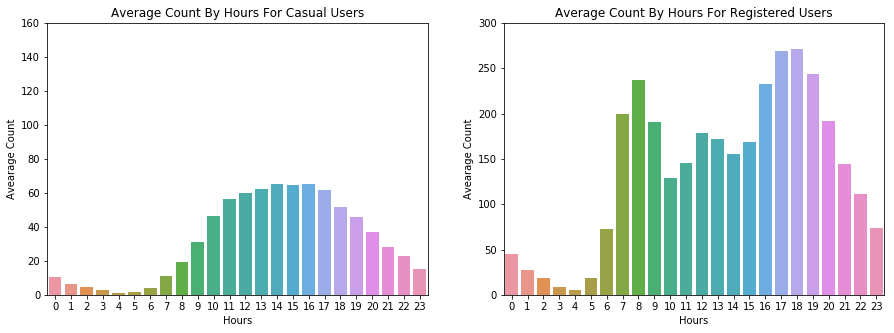

In [21]:
figure,(ax3)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax3[0].set(ylim=(0, 160))
ax3[1].set(ylim=(0, 300))

daysAggregated = pd.DataFrame(data.groupby("hours")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="hours",y="casual",ax=ax3[0])
ax3[0].set(xlabel='Hours', ylabel='Avearage Count',title="Average Count By Hours For Casual Users")


daysAggregated = pd.DataFrame(data.groupby("hours")["registered"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="registered",ascending=False)
sn.barplot(data=daysSorted,x="hours",y="registered",ax=ax3[1])
ax3[1].set(xlabel='Hours', ylabel='Avearage Count',title="Average Count By Hours For Registered Users")


[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across Season'),
 None]

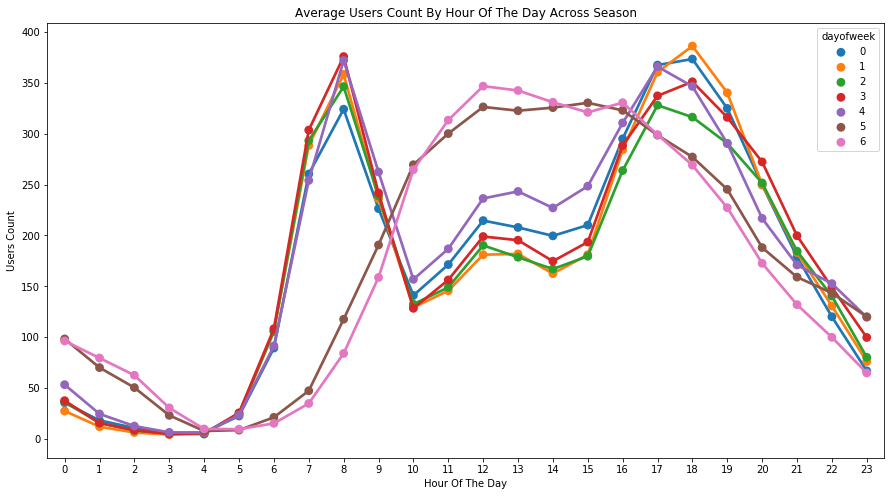

In [22]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","dayofweek"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["dayofweek"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


[Text(0,0.5,'Avearage Count'),
 Text(0.5,0,'Month'),
 Text(0.5,1,'Average Count By Month')]

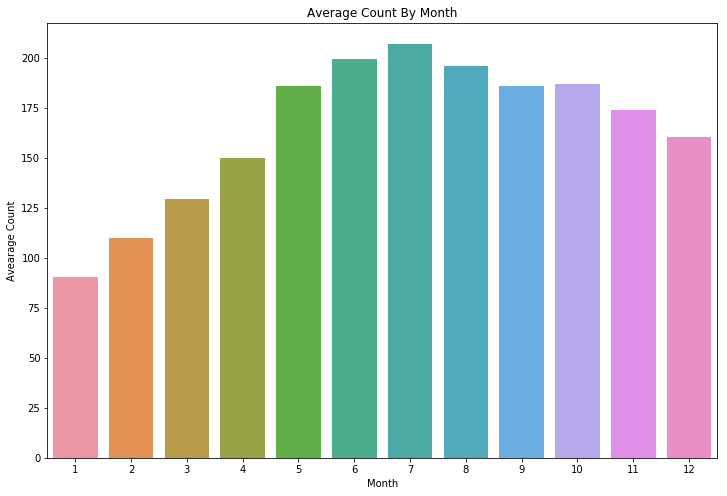

In [23]:

figure,(ax1)= plt.subplots(nrows=1, figsize=(12,8))

monthAggregated = pd.DataFrame(data.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")


[Text(0,0.5,'Avearage Count'),
 Text(0.5,0,'Month'),
 Text(0.5,1,'Average Count By Month For Registered Users')]

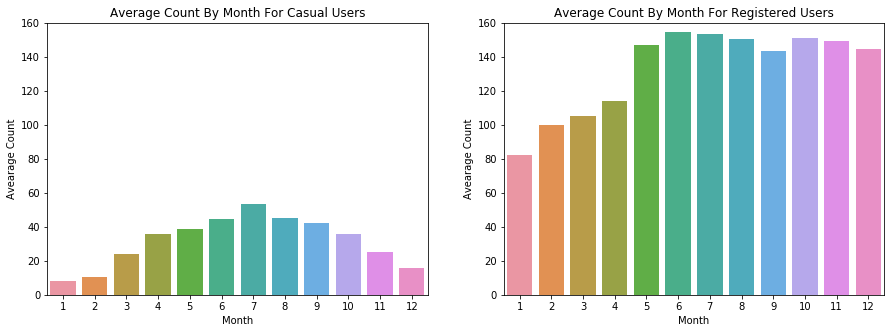

In [24]:
figure,(ax3)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax3[0].set(ylim=(0, 160))
ax3[1].set(ylim=(0, 160))

daysAggregated = pd.DataFrame(data.groupby("month")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="month",y="casual",ax=ax3[0])
ax3[0].set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month For Casual Users")


daysAggregated = pd.DataFrame(data.groupby("month")["registered"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="registered",ascending=False)
sn.barplot(data=daysSorted,x="month",y="registered",ax=ax3[1])
ax3[1].set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month For Registered Users")


[Text(0,0,'spring'), Text(0,0,'summer'), Text(0,0,'fall'), Text(0,0,'winter')]

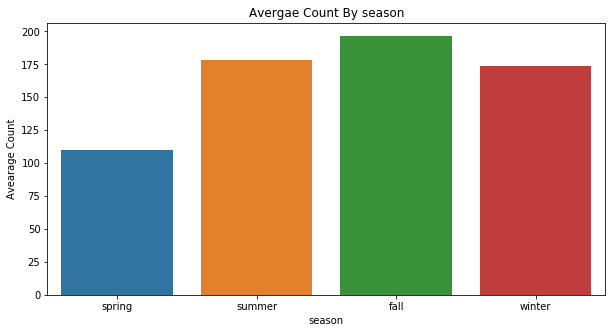

In [26]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("season")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=daysSorted,x="season",y="count",ax=ax3)
ax3.set(xlabel='season', ylabel='Avearage Count',title="Avergae Count By season")
ax3.set_xticklabels(["spring", "summer", "fall", "winter"])

[Text(0,0,'spring'), Text(0,0,'summar'), Text(0,0,'fall'), Text(0,0,'winter')]

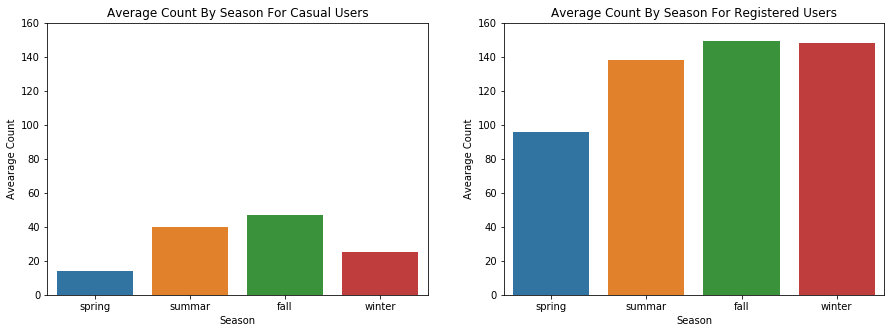

In [27]:
figure,(ax3)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax3[0].set(ylim=(0, 160))
ax3[1].set(ylim=(0, 160))

daysAggregated = pd.DataFrame(data.groupby("season")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="season",y="casual",ax=ax3[0])
ax3[0].set(xlabel='Season', ylabel='Avearage Count',title="Average Count By Season For Casual Users")
ax3[0].set_xticklabels(["spring", "summar", "fall", "winter"])


daysAggregated = pd.DataFrame(data.groupby("season")["registered"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="registered",ascending=False)
sn.barplot(data=daysSorted,x="season",y="registered",ax=ax3[1])
ax3[1].set(xlabel='Season', ylabel='Avearage Count',title="Average Count By Season For Registered Users")
ax3[1].set_xticklabels(["spring", "summar", "fall", "winter"])


[Text(0,0,'Sunday'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday')]

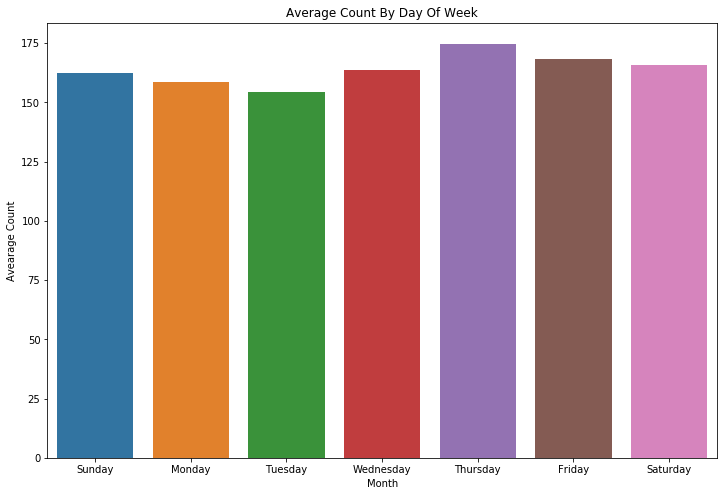

In [28]:

figure,(ax1)= plt.subplots(nrows=1, figsize=(12,8))

monthAggregated = pd.DataFrame(data.groupby("dayofweek")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="dayofweek",y="count",ax=ax1,order=[0, 1, 2, 3, 4, 5, 6])
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Day Of Week")
ax1.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

[Text(0,0,'Sunday'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday')]

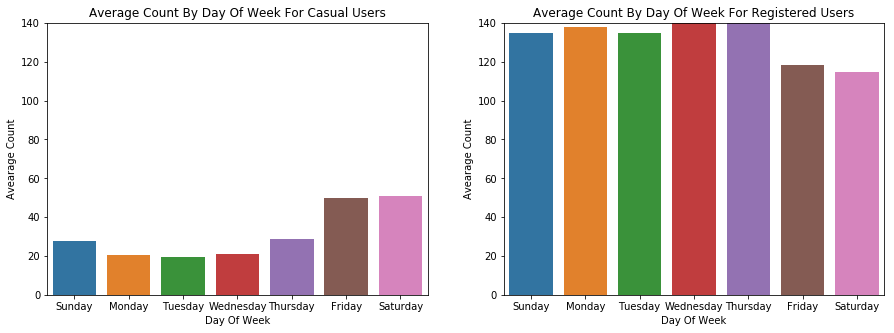

In [29]:
figure,(ax3)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax3[0].set(ylim=(0, 140))
daysAggregated = pd.DataFrame(data.groupby("dayofweek")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="dayofweek",y="casual",ax=ax3[0])
ax3[0].set(xlabel='Day Of Week', ylabel='Avearage Count',title="Average Count By Day Of Week For Casual Users")
ax3[0].set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

ax3[1].set(ylim=(0, 140))
daysAggregated = pd.DataFrame(data.groupby("dayofweek")["registered"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="registered",ascending=False)
sn.barplot(data=daysSorted,x="dayofweek",y="registered",ax=ax3[1])
ax3[1].set(xlabel='Day Of Week', ylabel='Avearage Count',title="Average Count By Day Of Week For Registered Users")
ax3[1].set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

[Text(0,0,'Partly cloudy'),
 Text(0,0,'Cloudy, Mist'),
 Text(0,0,'Light Snow, Light Rain'),
 Text(0,0,'Heavy Rain')]

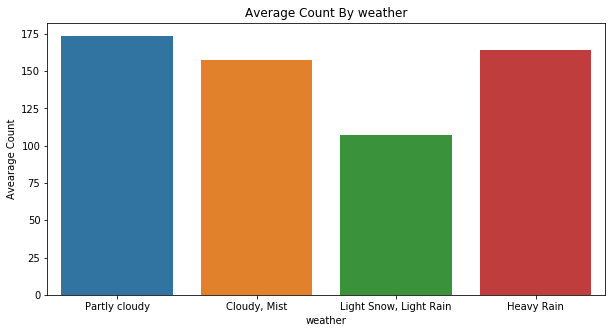

In [30]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("weather")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=daysSorted,x="weather",y="count",ax=ax3)
ax3.set(xlabel='weather', ylabel='Avearage Count',title="Average Count By weather")
ax3.set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])

[Text(0, 0, 'Partly cloudy'),
 Text(0, 0, 'Cloudy, Mist'),
 Text(0, 0, 'Light Snow, Light Rain')]

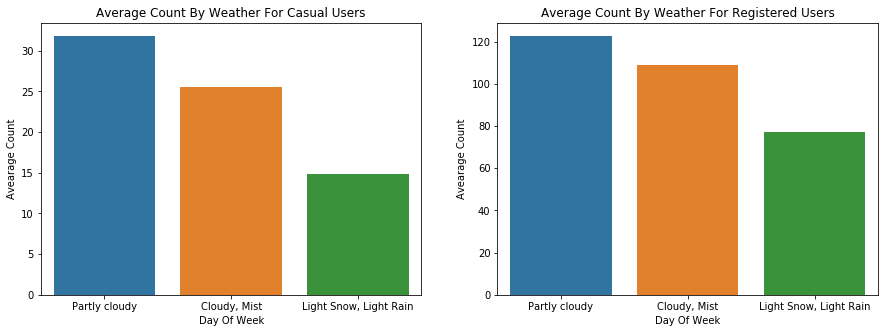

In [103]:
figure,(ax3)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("weather")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="weather",y="casual",ax=ax3[0])
ax3[0].set(xlabel='Day Of Week', ylabel='Avearage Count',title="Average Count By Weather For Casual Users")
ax3[0].set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])


daysAggregated = pd.DataFrame(data.groupby("weather")["registered"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="registered",ascending=False)
sn.barplot(data=daysSorted,x="weather",y="registered",ax=ax3[1])
ax3[1].set(xlabel='Day Of Week', ylabel='Avearage Count',title="Average Count By Weather For Registered Users")
ax3[1].set_xticklabels(["Partly cloudy", "Cloudy, Mist", "Light Snow, Light Rain", "Heavy Rain"])


[Text(0, 0, 'Holiday'), Text(0, 0, 'working days')]

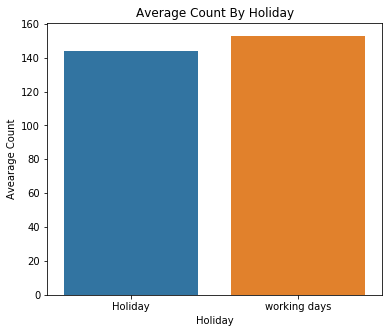

In [153]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(6,5))

daysAggregated = pd.DataFrame(data.groupby("holiday")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=daysSorted,x="holiday",y="count",ax=ax3)
ax3.set(xlabel='Holiday', ylabel='Avearage Count',title="Average Count By Holiday")
ax3.set_xticklabels(["Holiday", "working days"])

[Text(0, 0, 'Holiday'), Text(0, 0, 'working days')]

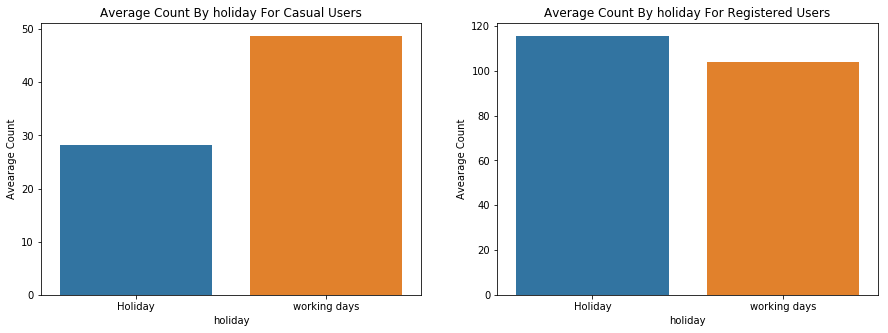

In [128]:
figure,(ax3)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("holiday")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="holiday",y="casual",ax=ax3[0])
ax3[0].set(xlabel='holiday', ylabel='Avearage Count',title="Average Count By holiday For Casual Users")
ax3[0].set_xticklabels(["Holiday", "working days"])


daysAggregated = pd.DataFrame(data.groupby("holiday")["registered"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="registered",ascending=False)
sn.barplot(data=daysSorted,x="holiday",y="registered",ax=ax3[1])
ax3[1].set(xlabel='holiday', ylabel='Avearage Count',title="Average Count By holiday For Registered Users")
ax3[1].set_xticklabels(["Holiday", "working days"])


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Average Count By Temperature')]

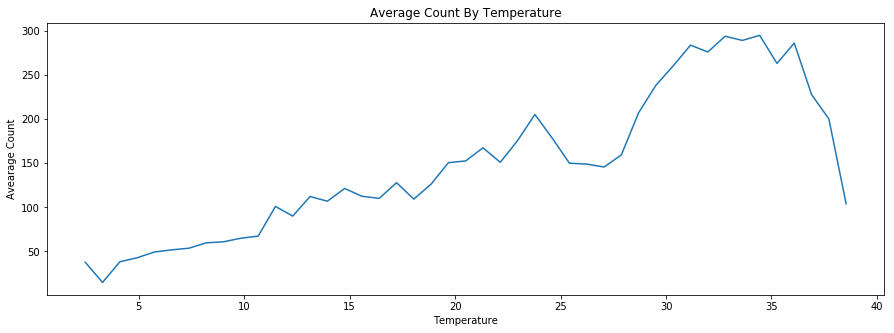

In [80]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("temp")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="temp",y="count",ax=ax3)
ax3.set(xlabel='Temperature', ylabel='Avearage Count',title="Average Count By Temperature")


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

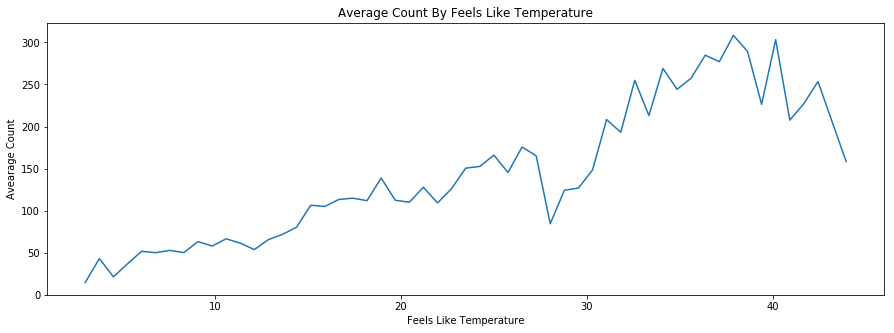

In [79]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("atemp")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="atemp",y="count",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'Avergae Count By Days of Year')]

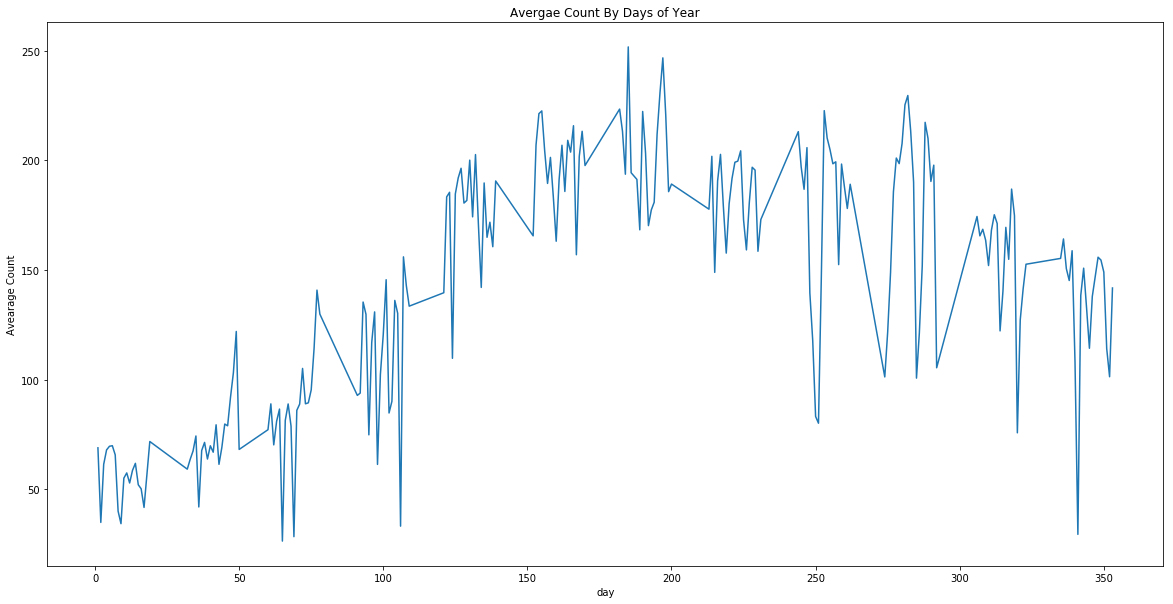

In [41]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(20,10))

daysAggregated = pd.DataFrame(data.groupby("day")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="day",y="count",ax=ax3)
ax3.set(xlabel='day', ylabel='Avearage Count',title="Avergae Count By Days of Year")

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'humidity'),
 Text(0.5, 1.0, 'Average Count By Humidity')]

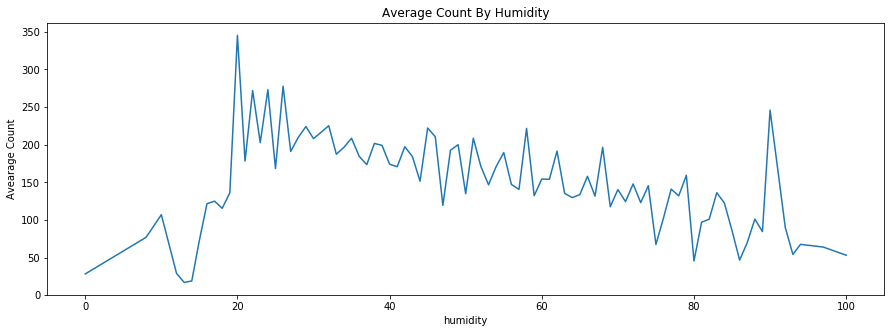

In [155]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(15,5))

daysAggregated = pd.DataFrame(data.groupby("humidity")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="humidity",y="count",ax=ax3)
ax3.set(xlabel='humidity', ylabel='Avearage Count',title="Average Count By Humidity")


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

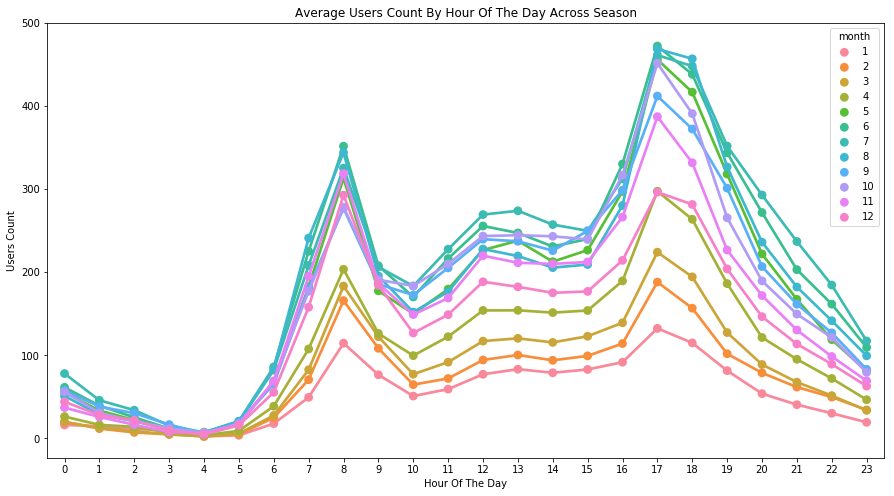

In [78]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","month"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["month"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'WindSpeed'),
 Text(0.5, 1.0, 'Average Count By weather')]

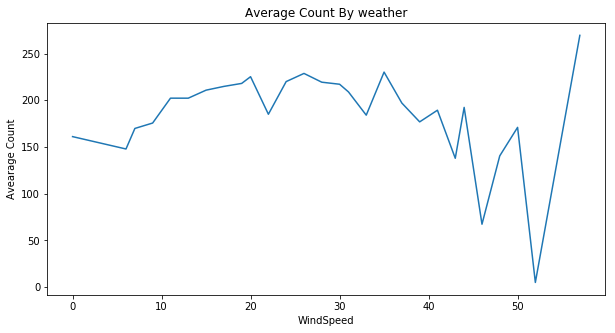

In [153]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("windspeed")["count"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="count",ascending=False)
sn.lineplot(data=daysSorted,x="windspeed",y="count",ax=ax3)
ax3.set(xlabel='WindSpeed', ylabel='Avearage Count',title="Average Count By weather")


# Correlation

In [139]:
data.corr()

,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,hours
temp,1.000000,0.992281,-0.046224,-0.012809,0.497850,0.371674,0.451194,0.294961,0.295500,-0.055483,0.132632
atemp,0.992281,1.000000,-0.025473,-0.052897,0.496524,0.369238,0.448812,0.305929,0.306285,-0.055474,0.126869
humidity,-0.046224,-0.025473,1.000000,-0.298072,-0.281247,-0.244811,-0.283334,0.187169,0.189662,-0.007842,-0.250902
windspeed,-0.012809,-0.052897,-0.298072,1.000000,0.072455,0.064238,0.073947,-0.193578,-0.197313,0.011066,0.130299
casual,0.497850,0.496524,-0.281247,0.072455,1.000000,0.506528,0.710342,0.123677,0.124945,0.236947,0.300515
registered,0.371674,0.369238,-0.244811,0.064238,0.506528,1.000000,0.966690,0.235935,0.235847,-0.086775,0.393313
count,0.451194,0.448812,-0.283334,0.073947,0.710342,0.966690,1.000000,0.229313,0.229618,-0.000499,0.410280
day,0.294961,0.305929,0.187169,-0.193578,0.123677,0.235935,0.229313,1.000000,0.998615,-0.002800,-0.009966
month,0.295500,0.306285,0.189662,-0.197313,0.124945,0.235847,0.229618,0.998615,1.000000,-0.002042,-0.010266
dayofweek,-0.055483,-0.055474,-0.007842,0.011066,0.236947,-0.086775,-0.000499,-0.002800,-0.002042,1.000000,-0.006334


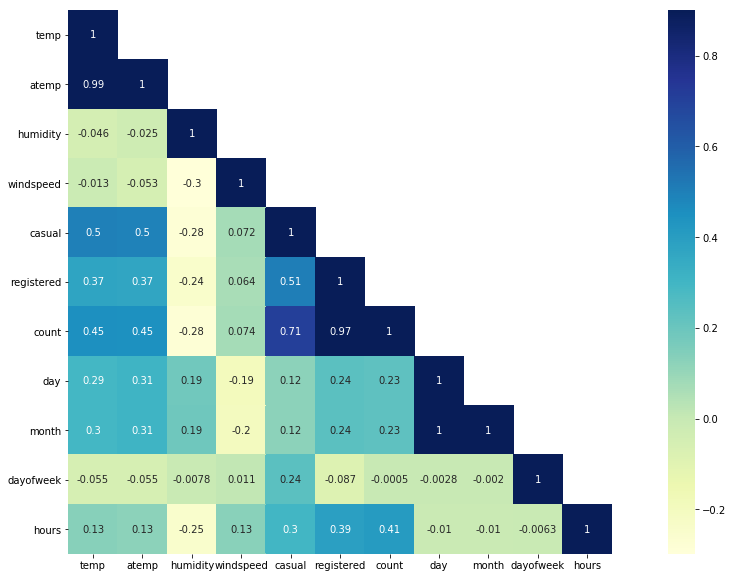

In [142]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True,cmap="YlGnBu")

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
dayofweek     10886 non-null int64
hours         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

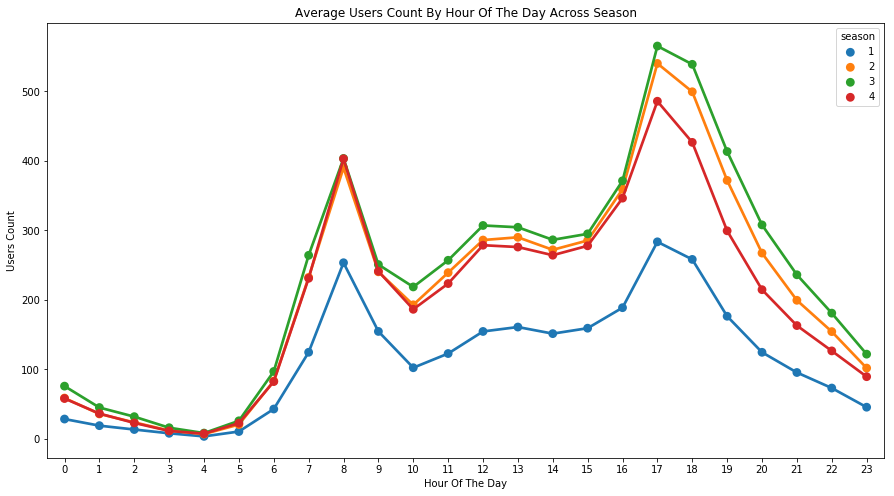

In [180]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weather'),
 None]

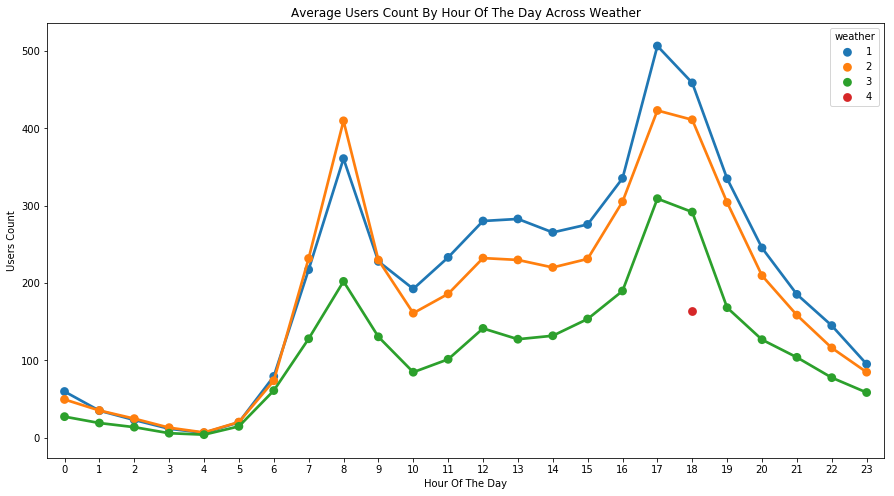

In [190]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","weather"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["weather"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weather",label='big')



[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day According to Holiday'),
 None]

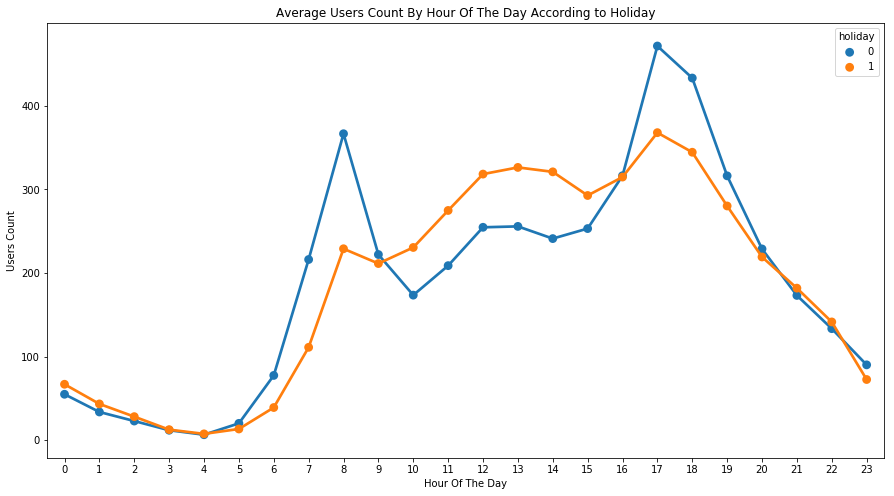

In [192]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","holiday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["holiday"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day According to Holiday",label='big')


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day According to Holiday'),
 None]

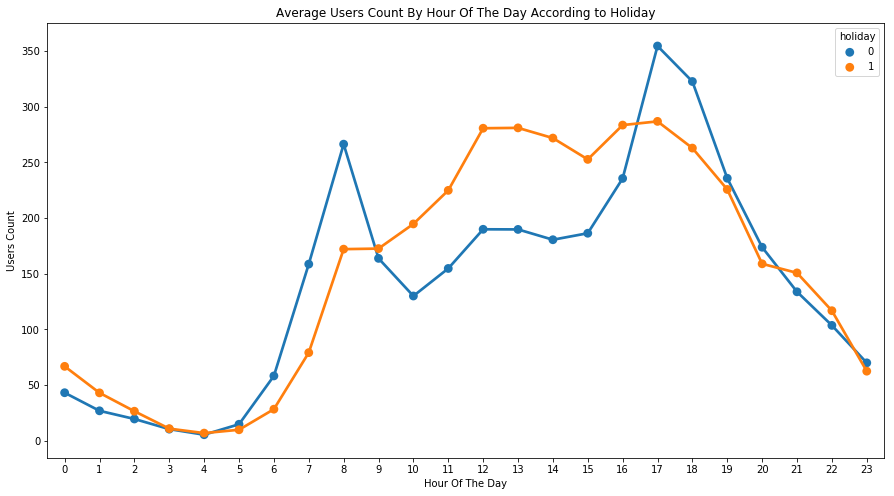

In [129]:
figure,(ax2)= plt.subplots(nrows=1, figsize=(15,8))

hourAggregated = pd.DataFrame(data.groupby(["hours","holiday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hours"], y=hourAggregated["count"],hue=hourAggregated["holiday"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day According to Holiday",label='big')


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
dayofweek     10886 non-null int64
hours         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

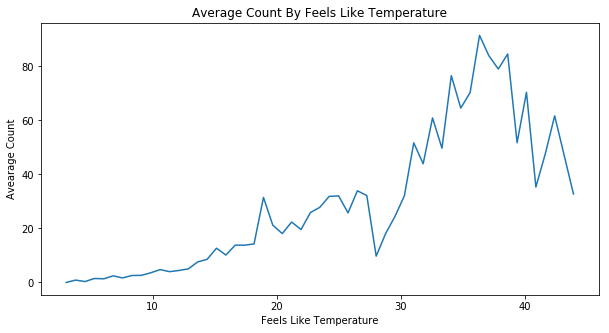

In [158]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("atemp")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.lineplot(data=daysSorted,x="atemp",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

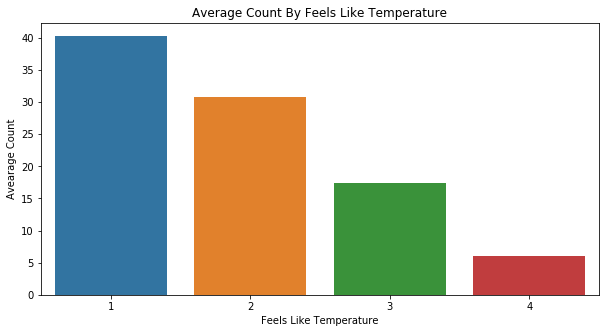

In [186]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("weather")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="weather",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Feels Like Temperature'),
 Text(0.5, 1.0, 'Average Count By Feels Like Temperature')]

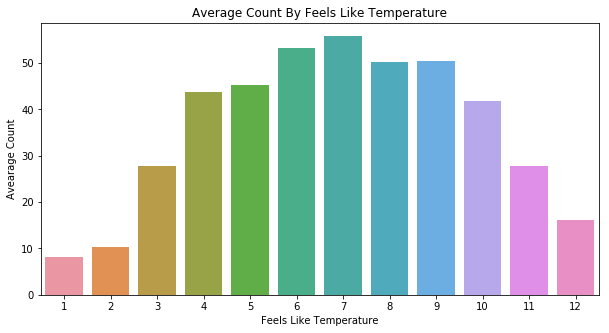

In [187]:
figure,(ax3)= plt.subplots(nrows=1, figsize=(10,5))

daysAggregated = pd.DataFrame(data.groupby("month")["casual"].mean()).reset_index()
daysSorted = daysAggregated.sort_values(by="casual",ascending=False)
sn.barplot(data=daysSorted,x="month",y="casual",ax=ax3)
ax3.set(xlabel='Feels Like Temperature', ylabel='Avearage Count',title="Average Count By Feels Like Temperature")

# Applying Model

# Separating Test And Training Data

In [33]:
X = data[['season', 'holiday', 'workingday', 'weather', 'temp' , 'humidity', 'windspeed', 'day', 'dayofweek', 'hours', 'month' ]]
Y = data['count']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

# Applying Linear Regression Model

In [42]:
lm = LinearRegression()
lm.fit(X_train,np.log1p(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
predictions = lm.predict(X_test)
lm.score(X_test,y_test)

-1.2608837396682153

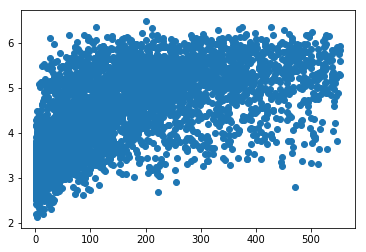

In [44]:
plt.scatter(y_test,predictions)

In [45]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [46]:
rms = sqrt(mean_squared_error(y_test, predictions))
print ("RMSLE Value: ",rmsle(y_test,np.exp(predictions)))

('RMSLE Value: ', 1.0245673109183935)


In [47]:
rms

217.1468868313054

In [69]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor


In [61]:
model = BaggingRegressor(LinearRegression(), n_estimators=150)
model.fit(X_train, np.log1p(y_train))
predictions = model.predict(X_test)

In [62]:
print ("RMSLE Value: ",rmsle(y_test,np.exp(predictions)))

('RMSLE Value: ', 1.0244991727425592)


In [68]:
model = BaggingRegressor(RandomForestRegressor())
model.fit(X_train, np.log1p(y_train))
predictions = model.predict(X_test)
print ("RMSLE Value: ",rmsle(y_test,np.exp(predictions)))

('RMSLE Value: ', 0.39899096161146635)


In [73]:
model = BaggingRegressor(GradientBoostingRegressor(n_estimators=4000))
model.fit(X_train, np.log1p(y_train))
predictions = model.predict(X_test)
print ("RMSLE Value: ",rmsle(y_test,np.exp(predictions)))

('RMSLE Value: ', 0.3347242187787976)


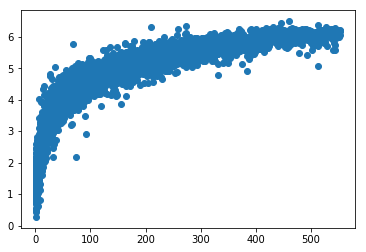

In [77]:
plt.scatter(y_test,predictions)